In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pickle


with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)


df_test = pd.read_csv('df_test.csv')



In [ ]:
from keras.models import load_model

model = load_model('hybrid_lstm_model.h5')
model.summary()

predictions = model.predict(X_test).flatten()

sequence_length = 24
df_test_seq = df_test.iloc[sequence_length:].reset_index(drop=True)
result_df = pd.DataFrame({
    'user_key': df_test_seq['user key'].values,
    'datetime': df_test_seq['datetime'].values,
    'predicted_probability': predictions
})


print(result_df)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,853 (50.21 KB)

 Trainable params: 12,851 (50.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

2260/2260 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step
                                   user_key             datetime  \
0      a83caccb-2b31-4973-aff2-7c1d0d16f121  2016-01-29 13:34:19   
1      86daa7e4-9e0a-4e8a-a3d3-94855867cb37  2016-04-02 23:02:35   
2      2a58ae85-e148-4127-a7bd-567882bbff65  2016-06-17 06:40:36   
3      c10dfed9-8548-4f3e-89f3-5b32c0b0e837  2016-04-13 08:50:23   
4      995f0d24-14c3-43f1-84bb-ee17b38e4d0c  2016-04-26 11:43:41   
...                                     ...                  ...   
72314  3100f73a-b4ae-4e98-9f70-5e59c07b17ab  2016-04-05 08:46:20   
72315  08835f7d-fd2f-48fc-a846-26608e3fdce0  2016-02-29 02:18:55   
72316  98396d65-f859-4da8-bd3c-b0e587406414  2016-02-15 23:31:52   
72317  6e11db25-bbc4-4bb7-bde7-8f1875d56f64  2016-04-01 18:55:03   
72318  c10dfed9-8548-4f3e-89f3-5b32c0b0e837  2016-06-30 14:48:07   

       predicted_probability  
0                   0.085909  
1                   0.092617  
2                   0.083526  
3              

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
# try different thresholds
for threshold in [0.094, 0.089, 0.093, 0.09, 0.095, 0.092, 0.091]:
    predicted_classes = (predictions > threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("Accuracy:", accuracy_score(y_test, predicted_classes))
    print("Precision:", precision_score(y_test, predicted_classes))
    print("Recall:", recall_score(y_test, predicted_classes))
    print("F1 Score:", f1_score(y_test, predicted_classes))



Threshold: 0.094
Accuracy: 0.8352023672893707
Precision: 0.0942975942975943
Recall: 0.09838859621939883
F1 Score: 0.09629966636336063

Threshold: 0.089
Accuracy: 0.6980738118613365
Precision: 0.09195097362975539
Recall: 0.2685156492097924
F1 Score: 0.136990632781313

Threshold: 0.093
Accuracy: 0.8166871776434962
Precision: 0.09635694790554171
Recall: 0.12581344902386118
F1 Score: 0.10913245077615752

Threshold: 0.09
Accuracy: 0.7343713270371548
Precision: 0.0937579617834395
Recall: 0.22807561202355128
F1 Score: 0.13288796605579128

Threshold: 0.095
Accuracy: 0.8512838949653618
Precision: 0.09278545729975383
Recall: 0.07592190889370933
F1 Score: 0.08351086493395825

Threshold: 0.092
Accuracy: 0.7928483524385016
Precision: 0.09352655162551245
Recall: 0.1519987604586303
F1 Score: 0.11580003541285487

Threshold: 0.091
Accuracy: 0.7657185525242329
Precision: 0.09348112549414773
Recall: 0.18686086148125194
F1 Score: 0.12461896150865409


In [ ]:
threshold = 0.09
anomaly_users = result_df[result_df['predicted_probability'] >= threshold]
anomaly_users.to_csv('anomaly_users.csv', index=False)
print(anomaly_users)

                                   user_key             datetime  \
1      86daa7e4-9e0a-4e8a-a3d3-94855867cb37  2016-04-02 23:02:35   
3      c10dfed9-8548-4f3e-89f3-5b32c0b0e837  2016-04-13 08:50:23   
21     ed482671-d9a1-468f-91a1-4147c995d811  2016-03-30 03:01:26   
30     80d297a3-aa52-4df0-b22b-a4b3478a4eb8  2016-01-04 07:33:06   
31     0b64a189-f0e5-4444-9bba-1200fefdbc47  2016-03-15 21:12:23   
...                                     ...                  ...   
72302  e14e44b0-1b85-4343-a618-61e92984adfd  2016-04-01 22:32:41   
72303  b536337c-af2f-4ba9-a935-7552c7230d16  2016-05-06 02:31:34   
72305  389444ad-438f-44f6-b3f9-1cb53bcc2207  2016-02-10 18:13:09   
72307  10595ac6-509a-49eb-8e4b-6c454977e095  2016-04-29 12:44:06   
72318  c10dfed9-8548-4f3e-89f3-5b32c0b0e837  2016-06-30 14:48:07   

       predicted_probability  
1                   0.092617  
3                   0.090297  
21                  0.099489  
30                  0.092039  
31                  0.091042

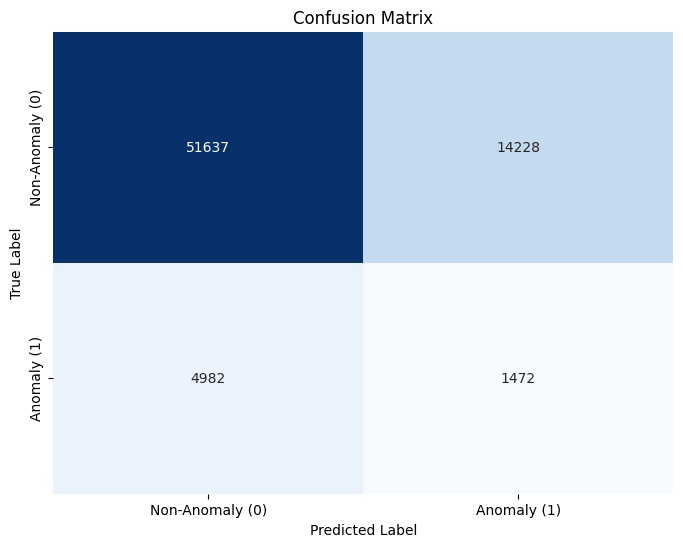

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


predicted_classes = (predictions > threshold).astype(int)
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.xticks([0.5, 1.5], ['Non-Anomaly (0)', 'Anomaly (1)'])
plt.yticks([0.5, 1.5], ['Non-Anomaly (0)', 'Anomaly (1)'], va='center')

plt.show()



In [ ]:
print(f"\nThreshold: {threshold}")
print("Accuracy:", accuracy_score(y_test, predicted_classes))
print("Precision:", precision_score(y_test, predicted_classes))
print("Recall:", recall_score(y_test, predicted_classes))
print("F1 Score:", f1_score(y_test, predicted_classes))



Threshold: 0.09
Accuracy: 0.7343713270371548
Precision: 0.0937579617834395
Recall: 0.22807561202355128
F1 Score: 0.13288796605579128
